# Visualizations of pFC PCR and pFC9 digest agarose gel DNA extraction results

In [1]:
import pandas as pd
import rpy2
%load_ext rpy2.ipython

Read dataframe with nanodrop results.

In [2]:
nanodrop = pd.read_csv('../tables/nanodrop_pFC_pcrs_and_digests.csv', sep='|')  # pipe delim due to markdown

Clean data.

In [3]:
nanodrop_trim = nanodrop.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
nanodrop_trim

,Sample name,Sample number,ng/ul,260/280,260/230,Date,Assay
0,pFC8tac (EH),1,12.2,1.820,-0.2550,08/04/21,PCR
1,pFC9 (EH),2,3.0,2.010,-0.0380,08/04/21,PCR
2,pFC8 (EH),3,1.2,3.700,-0.0100,08/04/21,PCR
3,pFC8T1T2 (RL),4,1.2,1.706,-0.0180,08/04/21,PCR
4,pFC8 (RL),5,-0.1,0.151,0.0020,08/04/21,PCR
5,pFC53(8)T1T2 (RL),6,2.2,1.823,-0.0370,08/04/21,PCR
6,pFC8T2 (RL),7,2.1,3.463,-0.0470,08/04/21,PCR
7,pFC8tac (EH),8,16.1,1.677,-0.3070,08/04/21,PCR
8,pFC8tac (EH),1,29.8,1.396,0.0042,08/03/21,PCR
9,pFC8tac (EH),2,77.3,2.781,0.0000,08/03/21,PCR


Plot data using ggplot2.

In [4]:
%%R -i nanodrop_trim
library(ggplot2)
library(ggpubr)
library(RColorBrewer)

colnames(nanodrop_trim)

[1] " Sample name       " " Sample number "     " ng/ul "            
[4] " 260/280 "           " 260/230 "           "Date"               
[7] "Assay"              


Format column names because they are wack.

In [5]:
%%R -i nanodrop_trim 
nano.df <- nanodrop_trim
colnames(nano.df) <- c(
    'Sample_name', 'Sample_number', 'ng_per_ul', 
    'protein_ratio', 'salt_ratio', 'Date', 'Assay'
)

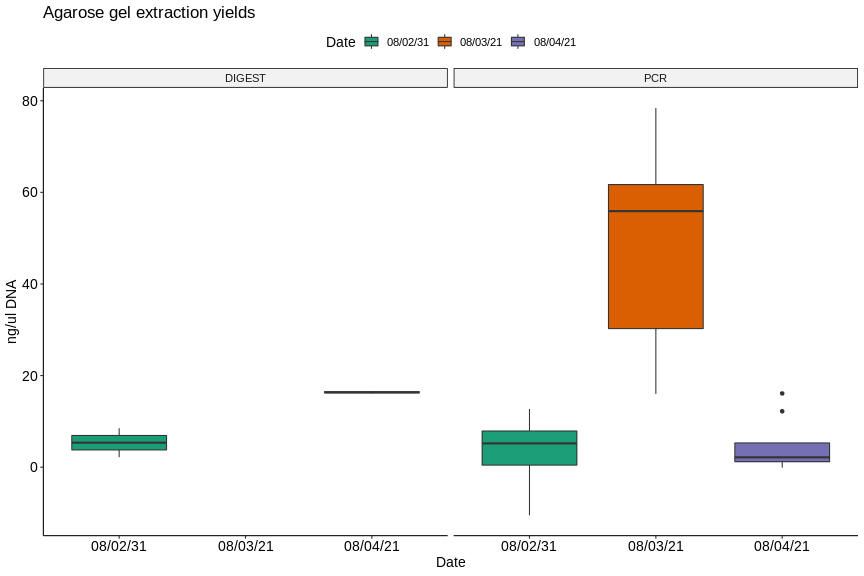

In [6]:
%%R -w 12 -h 8 --units in

ggplot(nano.df, aes(x=Date, y=ng_per_ul, fill=Date)) + geom_boxplot() + 
      facet_wrap(~Assay) + theme_pubr() + labs(
          y='ng/ul DNA', title='Agarose gel extraction yields'
      ) + scale_fill_brewer(palette='Dark2') +
      theme(text = element_text(size = 14))

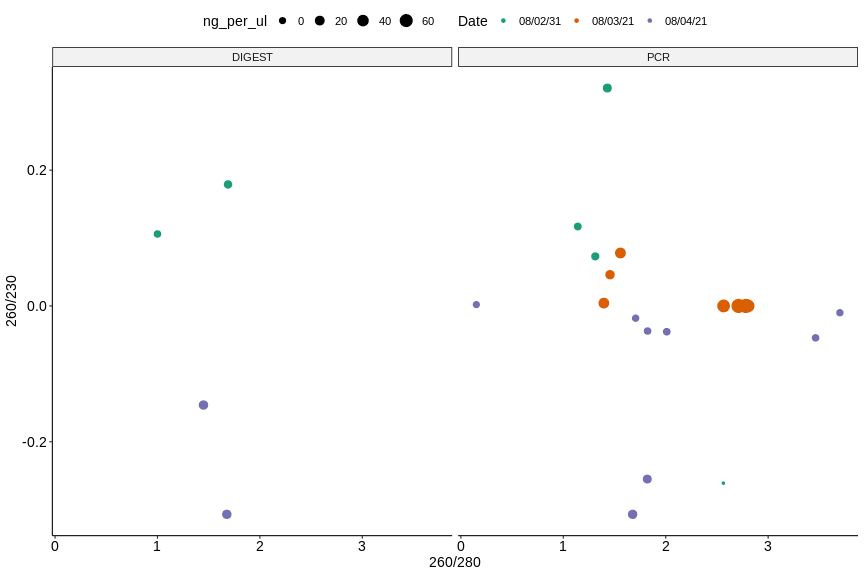

In [7]:
%%R -w 12 -h 8 --units in

# ideal protein ratio value = 1.8
# ideal salt ratio value >= 2 

# https://toptipbio.com/the-nanodrop-results-explained/


ratios <- ggplot(nano.df, aes(x=protein_ratio, y=salt_ratio, color=Date, size=ng_per_ul)) + 
    geom_point() +
    facet_wrap(~Assay) + theme_pubr() + 
    scale_color_brewer(palette='Dark2')  +
    labs(x='260/280', y='260/230') + theme(text = element_text(size = 14))
ratios

Overall shows both salt and protein contamination.

Add visualization of ideal ratio ranges.

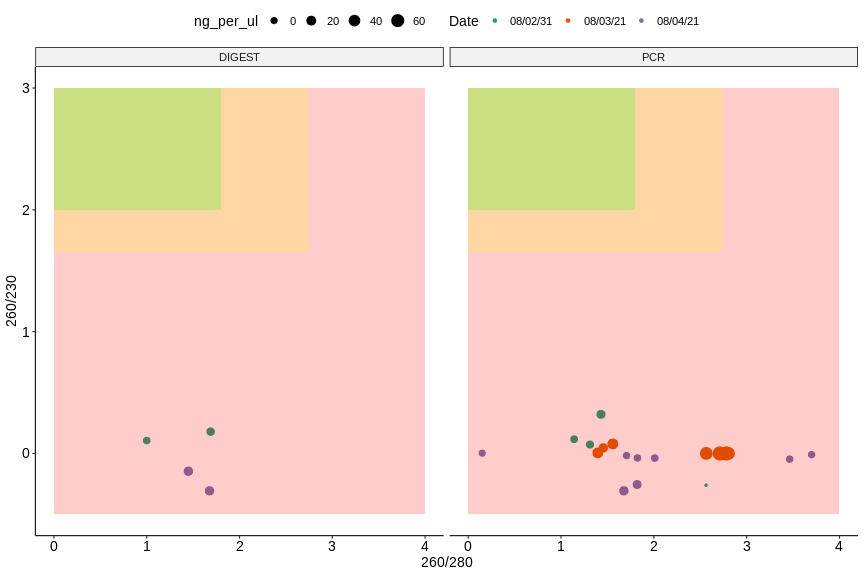

In [8]:
%%R -w 12 -h 8 --units in

ratios + annotate("rect", xmin = 0, xmax = 4, ymin = -0.5, ymax = 3,
                  alpha = .2, fill='red') + 
        annotate("rect", xmin = 0, xmax = 2.75, ymin = 1.65, ymax = 3,
                 alpha = .2, fill='yellow') +
        annotate("rect", xmin = 0, xmax = 1.8, ymin = 2, ymax = 3,
                alpha = .2, fill='green')
        

## 8-17-21 Extractions

In [9]:
nanodrop_8_17 = pd.read_csv('../tables/pFC9_LF_agarose_gel_extract_8-17-21.csv', sep=',')
nanodrop_8_17

,Sample name,Sample number,ng/ul,260/280,260/230,Date,Assay
0,pFC9,1,27.1,1.226,0.027,08/17/21,DIGEST
1,pFC9,2,29.3,1.285,0.027,08/17/21,DIGEST
2,pFC9,3,21.7,1.116,0.040,08/17/21,DIGEST
3,pFC9,4,8.6,1.116,0.043,08/17/21,DIGEST
4,pFC9,5,10.5,1.333,0.063,08/17/21,DIGEST


In [10]:
all_nano = nanodrop.append(nanodrop_8_17, ignore_index=True)
all_nano

,Sample name,Sample number,ng/ul,260/280,260/230,Date,Assay
0,pFC8tac (EH),1,12.2,1.820,-0.2550,08/04/21,PCR
1,pFC9 (EH),2,3.0,2.010,-0.0380,08/04/21,PCR
2,pFC8 (EH),3,1.2,3.700,-0.0100,08/04/21,PCR
3,pFC8T1T2 (RL),4,1.2,1.706,-0.0180,08/04/21,PCR
4,pFC8 (RL),5,-0.1,0.151,0.0020,08/04/21,PCR
5,pFC53(8)T1T2 (RL),6,2.2,1.823,-0.0370,08/04/21,PCR
6,pFC8T2 (RL),7,2.1,3.463,-0.0470,08/04/21,PCR
7,pFC8tac (EH),8,16.1,1.677,-0.3070,08/04/21,PCR
8,pFC8tac (EH),1,29.8,1.396,0.0042,08/03/21,PCR
9,pFC8tac (EH),2,77.3,2.781,0.0000,08/03/21,PCR


Turn graphing scripts into functions.

In [11]:
%%R

rename_ratios <- function(df){
    # rename table columns as having / in column names (for nanodrop ratios) causes issues

    nano.df <- df
    colnames(nano.df) <- c(
        'Sample_name', 'Sample_number', 'ng_per_ul', 
        'protein_ratio', 'salt_ratio', 'Date', 'Assay'
    )
    nano.df
}

In [12]:
%%R

plot_nano_points <- function(nano.df){
    
    ggplot(nano.df, aes(x=protein_ratio, y=salt_ratio, color=Date, size=ng_per_ul)) + 
    geom_point() +
    facet_wrap(~Assay) + theme_pubr() + 
    scale_color_brewer(palette='Dark2')  +
    labs(x='260/280', y='260/230') + theme(text = element_text(size = 14)) +
    theme(
                plot.title = element_text(color="black", size=18, face="bold"),
                axis.title.x = element_text(color="black", size=18, face="bold"),
                axis.title.y = element_text(color="black", size=18, face="bold"),
                axis.text.y = element_text(color="black", size=16, face="bold"),
                axis.text.x = element_text(color="black", size=16, face="bold"),
                strip.text = element_text(color="black", size=14, face="bold")
            )
    
}

Plot all nanodrop agaorse gel extraction data to date.

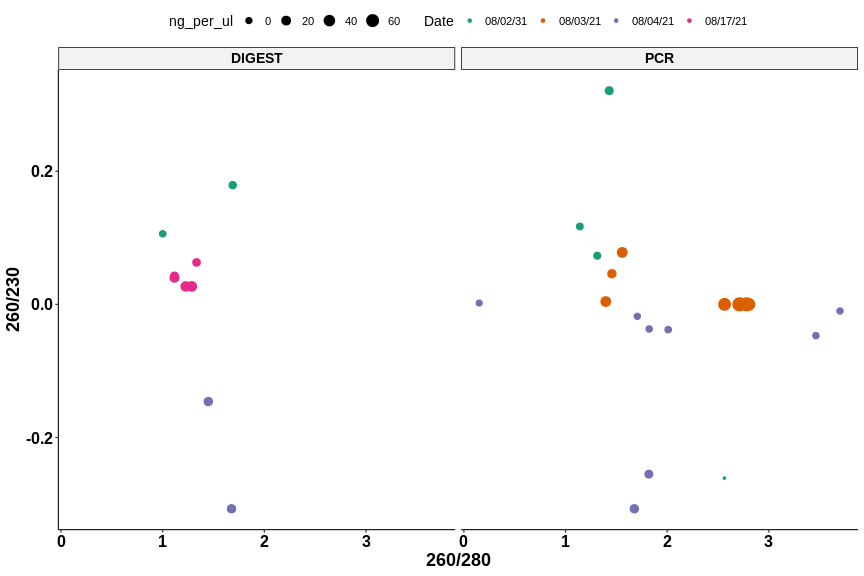

In [13]:
%%R -i all_nano -w 12 -h 8 --units in

all_nano.rename <- rename_ratios(all_nano)
plot_nano_points(all_nano.rename)

In [21]:
%%R -i all_nano -w 3 -h 5 --units in

barbplot_yields <- function(nano.df){
    all_nano.rename <- rename_ratios(nano.df)
    agg.df.mean <- aggregate(all_nano.rename[, c('ng_per_ul')], list(all_nano.rename$Date, all_nano.rename$Assay), mean)
    agg.df.sd <- aggregate(all_nano.rename[, c('ng_per_ul')], list(all_nano.rename$Date, all_nano.rename$Assay), sd)
    agg.df <- agg.df.mean
    agg.df$sd <- agg.df.sd$x

    ggplot(agg.df, aes(x=Group.1, y=x, fill=Group.1)) + geom_bar(stat='identity', color='black', size=1) +
           geom_errorbar( aes(x=Group.1, ymin=x-sd, ymax=x+sd), width=0.4, colour="black", size=1) +
            facet_wrap(~Group.2) +
            scale_color_brewer(palette='Dark2')  + theme_pubr() +
            labs(y='DNA (ng / ul)', x='Date') + theme(legend.position = "none") +
            theme(
                plot.title = element_text(color="black", size=18, face="bold"),
                axis.title.x = element_text(color="black", size=18, face="bold"),
                axis.title.y = element_text(color="black", size=18, face="bold"),
                axis.text.y = element_text(color="black", size=16, face="bold"),
                axis.text.x = element_text(color="black", size=16, face="bold"),
                strip.text = element_text(color="black", size=14, face="bold")
            ) +
            coord_flip()
    
    sub.1 <- subset(agg.df, Group.2=='DIGEST' & Group.1=='08/17/21')
    
    g <- ggplot(sub.1, aes(x=Group.1, y=x, fill=Group.1)) + geom_bar(stat='identity', color='black', size=1) +
           geom_errorbar( aes(x=Group.1, ymin=x-sd, ymax=x+sd), width=0.4, colour="black", size=1) +
            scale_color_brewer(palette='Dark2')  + theme_pubr() +
            labs(y='DNA (ng / ul)', x='', title='pFC9 agarose gel\nextraction') + theme(legend.position = "none") +
            theme(
                plot.title = element_text(color="black", size=18, face="bold"),
                axis.title.x = element_text(color="black", size=18, face="bold"),
                axis.title.y = element_text(color="black", size=18, face="bold"),
                axis.text.y = element_text(color="black", size=16, face="bold"),
                axis.text.x = element_text(color="black", size=16, face="bold"),
                strip.text = element_text(color="black", size=14, face="bold")
            )
    ggsave('box.png',g, dpi=500)
    
    
    
}

barbplot_yields(all_nano)

R[write to console]: Saving 3 x 5 in image



In [ ]:
ggplot()